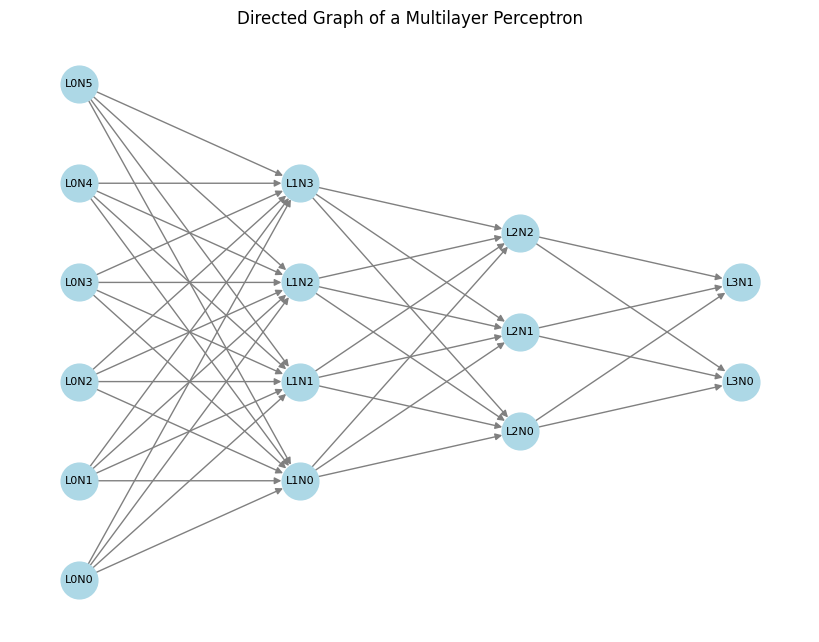

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_mlp():
    layers = [6, 4, 3, 2]  # Number of neurons in each layer
    G = nx.DiGraph()
    
    positions = {}  # To store node positions for visualization
    node_labels = {}
    
    x_offset = 0  # X-coordinate for layers
    node_id = 0   # Unique ID for each node
    
    for layer_idx, num_neurons in enumerate(layers):
        y_offset = -(num_neurons - 1) / 2  # Center neurons in the layer
        for i in range(num_neurons):
            G.add_node(node_id, layer=layer_idx)
            positions[node_id] = (x_offset, y_offset + i)
            node_labels[node_id] = f"L{layer_idx}N{i}"
            node_id += 1
        x_offset += 2  # Increase x position for next layer
    
    # Add edges between layers
    nodes_per_layer = [list(filter(lambda n: G.nodes[n]['layer'] == i, G.nodes)) for i in range(len(layers))]
    for i in range(len(layers) - 1):
        for node1 in nodes_per_layer[i]:
            for node2 in nodes_per_layer[i+1]:
                G.add_edge(node1, node2)
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos=positions, with_labels=True, labels=node_labels, node_size=700, node_color='lightblue', font_size=8, edge_color='gray')
    plt.title("Directed Graph of a Multilayer Perceptron")
    plt.show()

draw_mlp()

In [ ]:
import numpy as np

class MLP:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [np.random.randn(layers[i], layers[i - 1]) * 0.1 for i in range(1, len(layers))]   #generates initial weights connecting each neuron in previous node to each neuron in current node
        self.biases = [np.zeros((layers[i], 1)) for i in range(1, len(layers))]
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        activations = [X]
        for W, b in zip(self.weights, self.biases):
            X = self.sigmoid(np.dot(W, X) + b)
            activations.append(X)
        return activations
    
    def backward(self, X, Y, activations, learning_rate):
        deltas = [(activations[-1] - Y) * self.sigmoid_derivative(activations[-1])]
        
        for i in range(len(self.weights) - 1, 0, -1):
            deltas.insert(0, np.dot(self.weights[i].T, deltas[0]) * self.sigmoid_derivative(activations[i]))
        
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * np.dot(deltas[i], activations[i].T)
            self.biases[i] -= learning_rate * deltas[i]
    
    def train(self, X, Y, epochs, learning_rate):
        for epoch in range(epochs):
            activations = self.forward(X)
            self.backward(X, Y, activations, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean((Y - activations[-1]) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        return self.forward(X)[-1]
    

# Example usage
np.random.seed(42)
mlp = MLP([6, 4, 3, 2])
X = np.random.rand(6, 1)
Y = np.array([[0.1], [0.9]])
mlp.train(X, Y, epochs=5000, learning_rate=0.1)
prediction = mlp.predict(X)
print("Prediction:", prediction)

Epoch 0, Loss: 0.14009240555602473
Epoch 1000, Loss: 8.619983727572474e-05
Epoch 2000, Loss: 1.6400412599063573e-06
Epoch 3000, Loss: 3.818185716307943e-08
Epoch 4000, Loss: 9.157480763154611e-10
Prediction: [[0.1000043 ]
 [0.89999493]]


Seems to work so far, the model converged to get the output it was trained to get.

Now I'll try to run it on the MNIST dataset. Copying code from this website to load it in:
https://www.kaggle.com/code/hojjatk/read-mnist-dataset

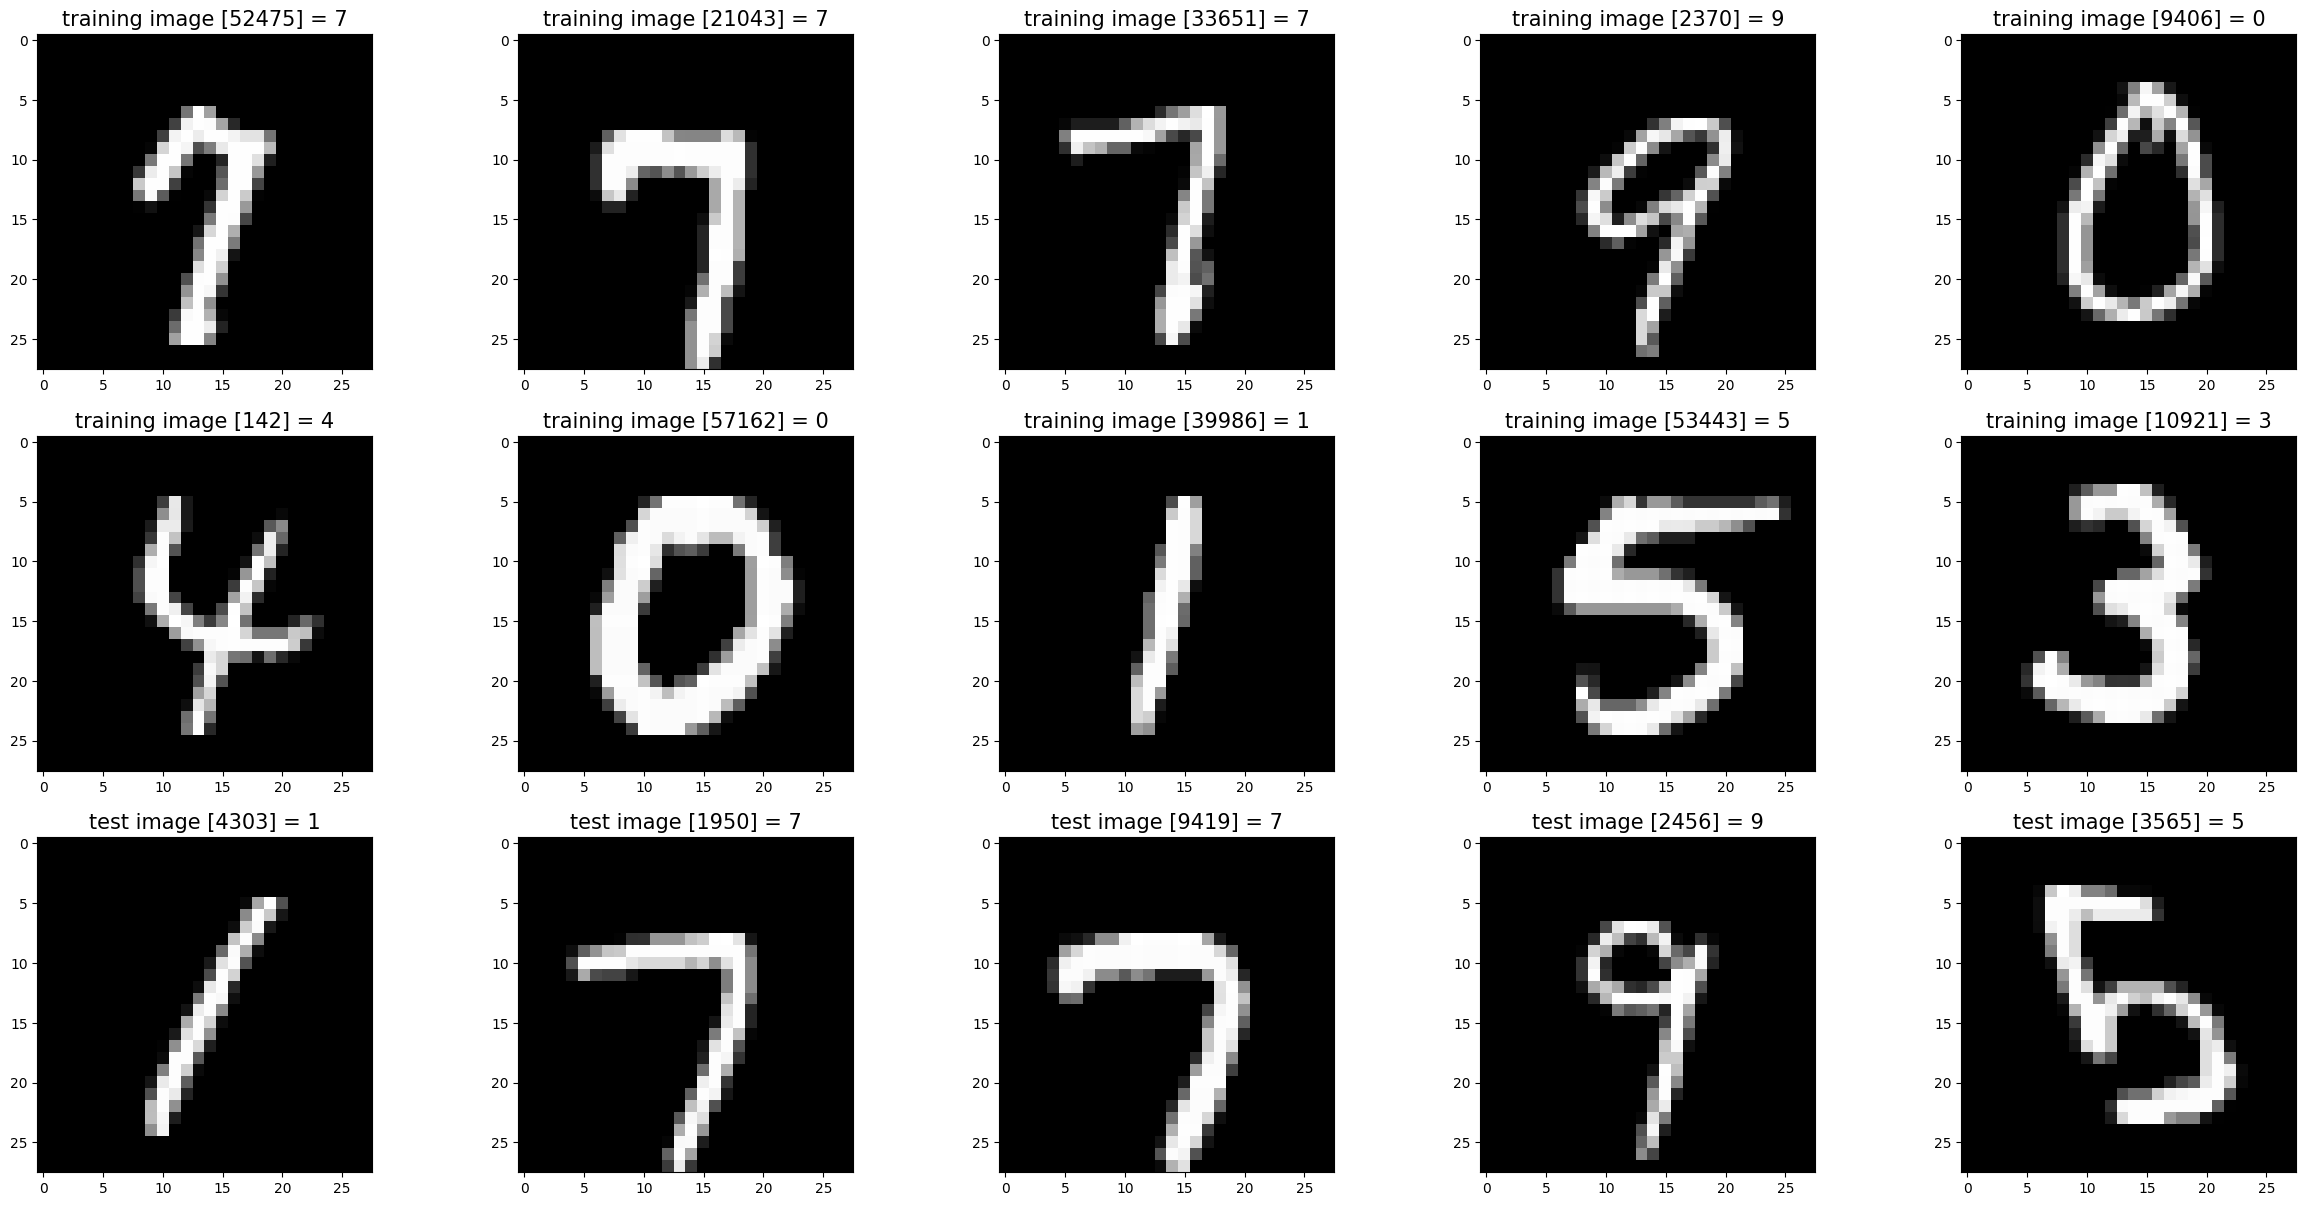

In [ ]:

# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 




# Verify Reading Dataset via MnistDataloader class

import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './input'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)


In [ ]:

# Example usage

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

np.random.seed(42)
mlp = MLP([6, 4, 3, 2])
mlp.train(x_train, y_train, x_test, y_test, epochs=5000, learning_rate=0.1)
prediction = mlp.predict(x_test[0].reshape(-1, 1))
print("Prediction:", prediction)